##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **TESTING NEURAL NETWORK AND HYPERPARAMETERS**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general neural network with some of the most important configurations. Test it with different data sets and track it's performance with differents hyperparameters

In [1]:
#import used pakages
import sys
import os
import random
if 'network' in sys.modules:
    del sys.modules['network']
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from network import Network
import matplotlib.pyplot as plt

In [2]:
def testing_network(datasets):
    for dataset_name in datasets:
        data_path = '../data/'+dataset_name
        data = np.loadtxt(data_path, delimiter=',', dtype=int)
        X = data[:, :-1]
        y = data[:, -1] 

        dataset = list(zip(X, y))
        train_size = int(len(dataset) * 0.6)
        val_size = int((1-train_size)/2)
        train_data = dataset[:train_size]
        val_data = dataset[:val_size]
        test_data = dataset[val_size:]

        network1 = Network([2, 100, 100,1])
        network1.SGD(train_data, validation_data=val_data)
        prediction, accuracy = network1.evaluate(test_data)
        print('accuracy '+dataset_name )
        print(accuracy)
        print()

datasets = ['and_test.csv', 'or_test.csv', 'xor_test.csv']
testing_network(datasets)

accuracy and_test.csv
1.0

accuracy or_test.csv
1.0

accuracy xor_test.csv
1.0



In [3]:
# ------------- training the mnist dataset -------------------
# Preparing the train, validation and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

def one_hot(y, n_classes=10):
    oh = np.zeros((y.size, n_classes))
    oh[np.arange(y.size), y] = 1
    return oh

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)
y_val_oh = one_hot(y_val)
training_data = list(zip(X_train, y_train_oh))
test_data = list(zip(X_test, y_test_oh))
val_data = list(zip(X_val, y_val_oh))

In [4]:
#Let's evaluate the performance of the neural network whithout using hyperparameters that enhance it's accuracy
net_mnist1 =  Network([784, 70, 70, 10])
training_cost1, training_accuracy1, evaluation_cost1, evaluation_accuracy1 = \
        net_mnist1.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost1, accuracy1 = net_mnist1.evaluate(test_data)
print('MNIST model Accuracy whithout any hyperparameter')
print(accuracy1)

MNIST model Accuracy whithout any hyperparameter
0.9534


In [5]:
#This is how the performance changes using the cost entropy function
net_mnist2 =  Network([784, 70, 70, 10], cost='cross_entropy')
training_cost2, training_accuracy2, evaluation_cost2, evaluation_accuracy2 = \
        net_mnist2.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost2, accuracy2 = net_mnist2.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy2)

MNIST model Accuracy whit the cross entropy function
0.9688


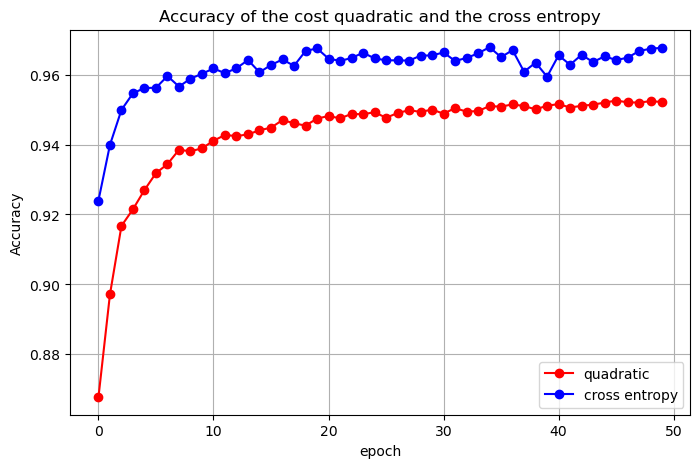

In [6]:
#plotting the difference between the cost quadratic and the cross entropy in the accuracy
acc_data1 = np.array(evaluation_accuracy1)
acc_data2 = np.array(evaluation_accuracy2)
plt.figure(figsize=(8,5))
plt.plot(acc_data1, marker='o', linestyle='-', color='r', label='quadratic')
plt.plot(acc_data2, marker='o', linestyle='-', color='b', label='cross entropy')
plt.title('Accuracy of the cost quadratic and the cross entropy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('../assets/AccuracyByCostFunction.png')
plt.show()

There's a clear domination of the cost function cross entropy, which performs betters againts the quadratic cost function, reaching a better accuracy sooner and better in the epochs.
This happens because the quadratic cost functions is multiplied  by the sigmoid derivate which cause a slow down when the derivate is near of 0 o 1

In [6]:
#Comparison of the accuracy with a random weight initializer and the Gaussian
net_mnist3 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian')
training_cost3, training_accuracy3, evaluation_cost3, evaluation_accuracy3 = \
        net_mnist3.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist3.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9745


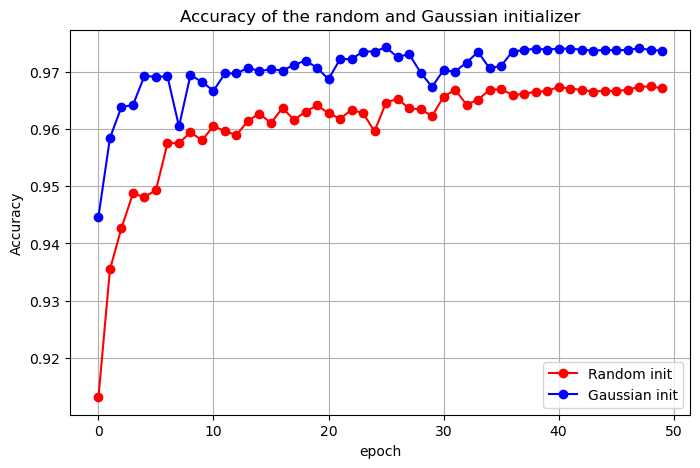

In [ ]:
acc_data2 = np.array(evaluation_accuracy2)
acc_data3 = np.array(evaluation_accuracy3)
plt.figure(figsize=(8,5))
plt.plot(acc_data2, marker='o', linestyle='-', color='r', label='Random init')
plt.plot(acc_data3, marker='o', linestyle='-', color='b', label='Gaussian init')
plt.title('Accuracy of the random and Gaussian initializer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('../assets/AccuracyByInitializer.png')
plt.show()

The Guassian initializer is the clear winner for better performance. This is because its normal distribution for the weights prevents extreme values, which helps to keep the error signal from exploding or vanishing across the layers

In [8]:
#Like in others models the regularization is a great improvement to avoid the overfitting. Let's se how the model works with the lambda hyperparameter
net_mnist4 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.1)
training_cost4, training_accuracy4, evaluation_cost4, evaluation_accuracy4 = \
        net_mnist4.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

net_mnist5 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01)
training_cost5, training_accuracy5, evaluation_cost5, evaluation_accuracy5 = \
        net_mnist5.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

net_mnist6 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost6, training_accuracy6, evaluation_cost6, evaluation_accuracy6 = \
        net_mnist6.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)

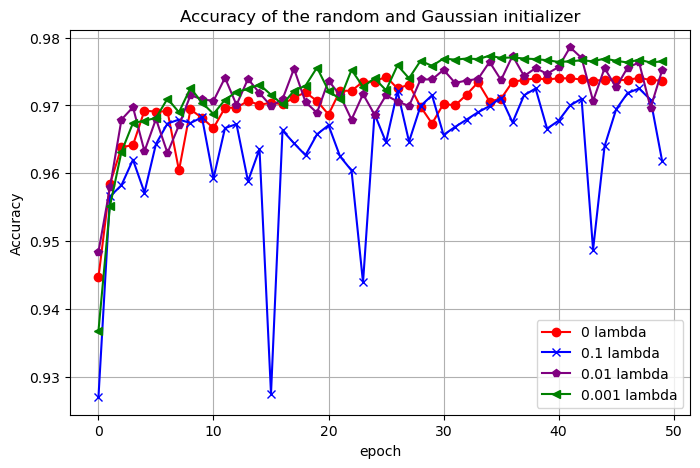

In [ ]:
acc_data3 = np.array(evaluation_accuracy3)
acc_data4 = np.array(evaluation_accuracy4)
acc_data5 = np.array(evaluation_accuracy5)
acc_data6 = np.array(evaluation_accuracy6)
plt.figure(figsize=(8,5))
plt.plot(acc_data3, marker='o', linestyle='-', color='r', label='0 lambda')
plt.plot(acc_data4, marker='x', linestyle='-', color='b', label='0.1 lambda')
plt.plot(acc_data5, marker='p', linestyle='-', color='purple', label='0.01 lambda')
plt.plot(acc_data6, marker='<', linestyle='-', color='g', label='0.001 lambda')
plt.title('Accuracy Model by lambda parameter')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('../assets/AccuracyByLambda.png')
plt.show()

The lambda parameter effectively enhances performance on the validation data, resulting in higger accuracy. This is a iterative process where the value is adjusted until a good accuracy is achieved. The graph above shows that the two better parameters are 0.01 and 0.001, the firts one with a higher variability but with the higger accuracy, the second one shows a better performance than lambda 0 and less than parameter 0.01, but lower variability.

In [10]:
#Let's track the neural network behavior with differents learning rates
net_mnist7 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost7, training_accuracy7, evaluation_cost7, evaluation_accuracy7 = \
        net_mnist7.SGD(training_data, epochs=50, batch_size=25, lr=1.5, validation_data=val_data)

net_mnist8 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost8, training_accuracy8, evaluation_cost8, evaluation_accuracy8 = \
        net_mnist8.SGD(training_data, epochs=50, batch_size=25, lr=2, validation_data=val_data)

net_mnist9 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.001)
training_cost9, training_accuracy9, evaluation_cost9, evaluation_accuracy9 = \
        net_mnist9.SGD(training_data, epochs=50, batch_size=25, lr=2.5, validation_data=val_data)

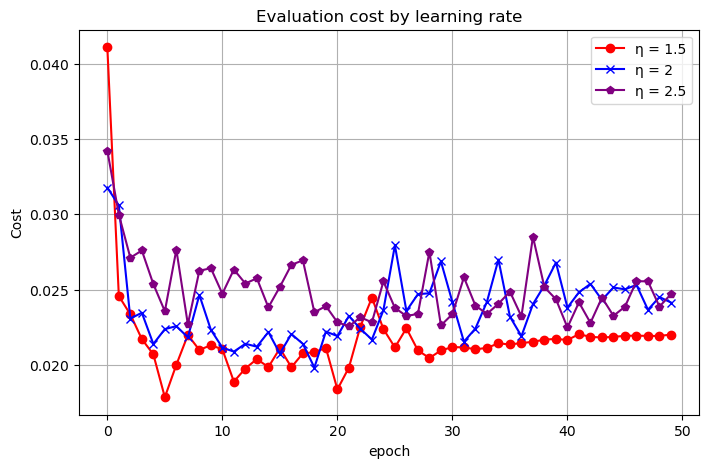

In [ ]:
eval_cost7 = np.array(evaluation_cost7)
eval_cost8 = np.array(evaluation_cost8)
eval_cost9 = np.array(evaluation_cost9)
plt.figure(figsize=(8,5))
plt.plot(eval_cost7, marker='o', linestyle='-', color='r', label='η = 1.5')
plt.plot(eval_cost8, marker='x', linestyle='-', color='b', label='η = 2')
plt.plot(eval_cost9, marker='p', linestyle='-', color='purple', label='η = 2.5')
plt.title('Evaluation cost by learning rate')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.legend()
plt.savefig('../assets/CostBy_η.png')
plt.grid(True)

The plot shows how the cost slows down until epoch 10 and then increases gradually. This happens because the model starts to overfit the data and loses its capacity to predict new values for the validation data.  
To addres this problem, a learning rate schedule is a good tool to reduce the overfitting. Early stopping is going to be used as well to avoid the overtraining. 

In [12]:
#setting the step_lr to True to avoid overfitting and improve the cost
net_mnist10 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01)
training_cost10, training_accuracy10, evaluation_cost10, evaluation_accuracy10 = \
        net_mnist10.SGD(training_data, epochs=50, batch_size=25, lr=1, validation_data=val_data, step_lr=True)
eval_cost10 = np.array(evaluation_cost10)
eval_acc10 = np.array(evaluation_accuracy10)

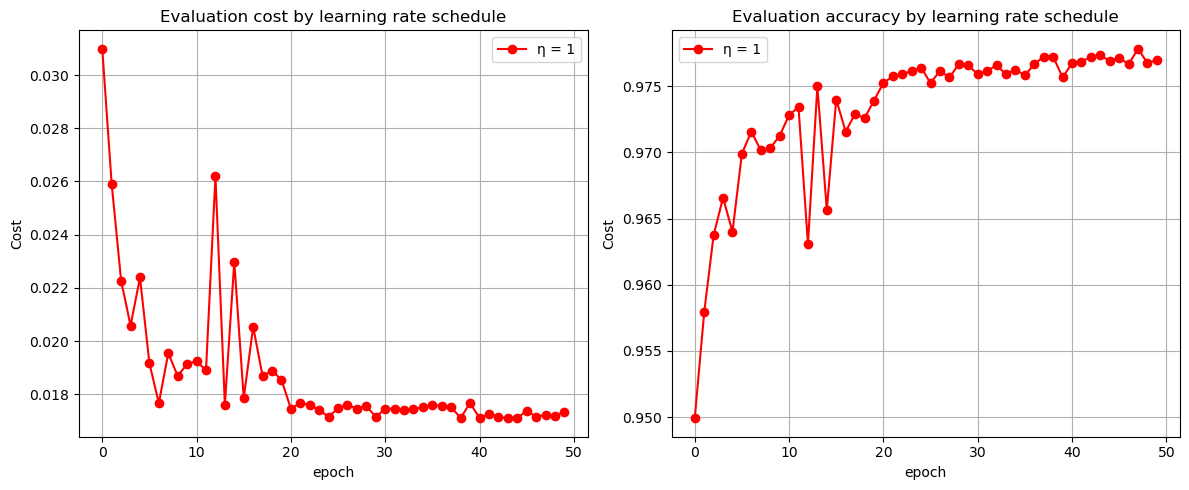

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(eval_cost10, marker='o', linestyle='-', color='r', label='η = 1')
ax1.set_title('Evaluation cost by learning rate schedule')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Cost')
ax1.legend()
ax1.grid(True)

ax2.plot(eval_acc10, marker='o', linestyle='-', color='r', label='η = 1')
ax2.set_title('Evaluation accuracy by learning rate schedule')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Cost')
ax2.legend()
ax2.grid(True)
plt.savefig('../assets/TestingLearningRateSchedule.png')
plt.tight_layout()
plt.show()

In [22]:
#Neural networl with Early stopping and schedule learning rate 
net_mnist10 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01, n_early_stop=10)
training_cost10, training_accuracy10, evaluation_cost10, evaluation_accuracy10 = \
        net_mnist10.SGD(training_data, epochs=50, batch_size=25, lr=1, validation_data=val_data, step_lr=True)
eval_cost10 = np.array(evaluation_cost10)

Early stopping: no improvement in 10 epochs


In [23]:
cost, accuracy = net_mnist10.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9792


In [24]:
#Neural networl without Early stopping and schedule learning rate to compare
net_mnist11 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01)
training_cos11, training_accuracy11, evaluation_cost11, evaluation_accuracy11 = \
        net_mnist11.SGD(training_data, epochs=50, batch_size=25, lr=1, validation_data=val_data)


In [25]:
cost, accuracy = net_mnist11.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.978


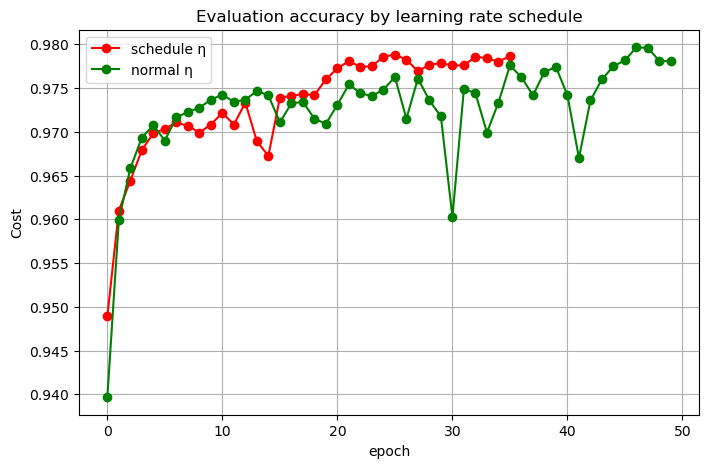

In [ ]:
eval_acc10 = np.array(evaluation_accuracy10)
eval_acc11 = np.array(evaluation_accuracy11)
plt.figure(figsize=(8,5))
plt.plot(eval_acc10, marker='o', linestyle='-', color='r', label='schedule η')
plt.plot(eval_acc11, marker='o', linestyle='-', color='g', label='normal η')
plt.title('Evaluation accuracy by learning rate schedule')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.legend()
plt.savefig('../assets/Comparing_η.png')
plt.grid(True)

The schedule learning rate show a clear improvement compare to the normal learning rate. With low accuracy variability and higher values of accuracy.

#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

In [ ]:
# Let's use the random search to find the better combination of hyperparameter to get the highest accuracy
param_grid = {
    'hidden_layer_sizes': [[100, 100], [200, 100], [300, 200]],
    'learning_rate': [0.01, 0.1, 1.0, 1.5],
    'lmbda': [0.001, 0.01, 0.1],  
    'batch_size': [24, 32, 64, 128]
}

def random_parameters(param_grid, n_samples):
    samples = []
    for _ in range(n_samples):
        sample = {k: random.choice(v) for k, v in param_grid.items()}
        samples.append(sample)
    return samples

def random_search(param_grid, model, in_out_layers, training_data, epochs, validation_data, test_data, n_sample):
    parameters = random_parameters(param_grid, n_sample)
    results = []
    input = [in_out_layers[0]]
    output = [in_out_layers[1]]
    
    for params in parameters:
        layers = np.concatenate((input, params['hidden_layer_sizes'], output), axis=0)
        neural_net = model(
                        layers,
                        cost='cross_entropy',
                        initializer = 'Gaussian',
                        lmbda = params['lmbda']
                        )
        neural_net.SGD(training_data, epochs, params['batch_size'], params['learning_rate'], validation_data)
        cost, accuracy = neural_net.evaluate(test_data)
        results.append({"params": params, "accuracy": accuracy})

    results = sorted(results, key=lambda x: x["accuracy"], reverse=True)
    return results

In [ ]:
#Training randomly different combinations of hyperparameters
random_search_model = random_search(param_grid, Network, [784, 10], training_data, 50, val_data, test_data, 20)
print('The best three combination of hyperparameters')
for i in random_search_model[:3]:
    print('accuracy: ', i['accuracy'])
    print(i)

The best three combination of hyperparameters
accuracy:  0.9843
{'params': {'hidden_layer_sizes': [200, 100], 'learning_rate': 1.0, 'lmbda': 0.01, 'batch_size': 24}, 'accuracy': 0.9843}
accuracy:  0.984
{'params': {'hidden_layer_sizes': [300, 200], 'learning_rate': 1.5, 'lmbda': 0.1, 'batch_size': 64}, 'accuracy': 0.984}
accuracy:  0.9813
{'params': {'hidden_layer_sizes': [300, 200], 'learning_rate': 1.0, 'lmbda': 0.1, 'batch_size': 128}, 'accuracy': 0.9813}


In [80]:
best_params = random_search_model[0]['params']
layers = np.concatenate(([784], best_params['hidden_layer_sizes'], [10]), axis=0)
layers

array([784, 200, 100,  10])

In [84]:
random_search_model[0]['params']

{'hidden_layer_sizes': [200, 100],
 'learning_rate': 1.0,
 'lmbda': 0.01,
 'batch_size': 24}

In [87]:
best_params = random_search_model[0]['params']
layers = np.concatenate(([784], best_params['hidden_layer_sizes'], [10]), axis=0)
best_network =  Network(layers, cost='cross_entropy', lmbda = best_params['lmbda'],initializer='Gaussian', n_early_stop=10)

best_training_cost, best_training_accuracy, best_evaluation_cost, best_evaluation_accuracy = \
        best_network.SGD(training_data, epochs=50, batch_size=best_params['batch_size'], lr=best_params['learning_rate'],\
                        validation_data=val_data, step_lr=True)

Early stopping: no improvement in 10 epochs


C:\Users\konec\AppData\Local\Temp\ipykernel_13136\119792110.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\konec\AppData\Local\Temp\ipykernel_13136\119792110.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


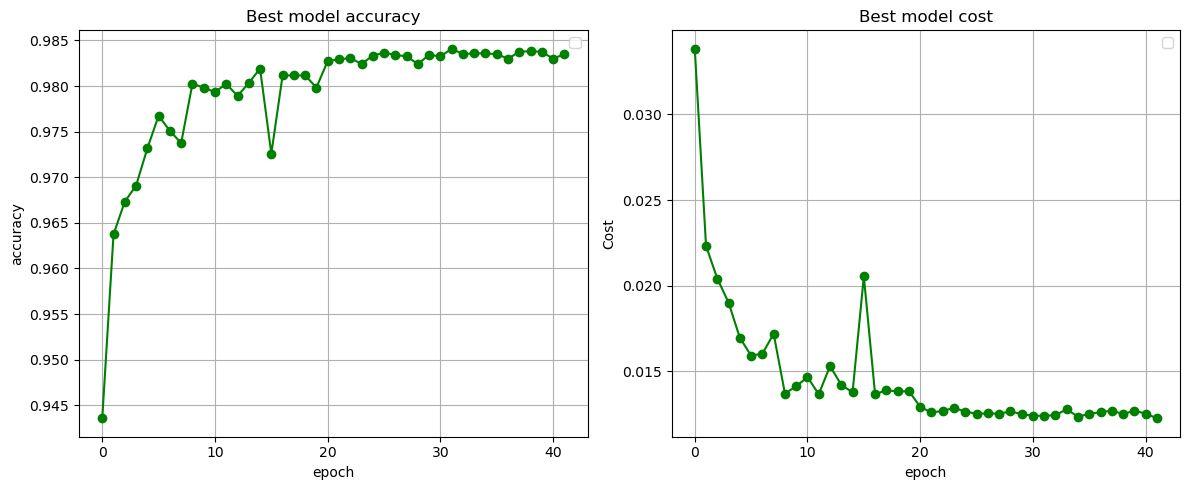

In [ ]:
best_eval_acc = np.array(best_evaluation_accuracy)
best_eval_cost = np.array(best_evaluation_cost)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(best_eval_acc, marker='o', linestyle='-', color='g')
ax1.set_title('Best model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(best_eval_cost, marker='o', linestyle='-', color='g')
ax2.set_title('Best model cost')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Cost')
ax2.legend()
ax2.grid(True)
plt.savefig('../assets/BestModelRandSearchCost_Accuracy.png')
plt.tight_layout()
plt.show()